In [50]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 
               'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 
               'slope',
               'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(20))

    age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63    1   1       145  233    1        2      150      0      2.3      3   
1    67    1   4       160  286    0        0      108      1      1.5      2   
2    67    1   4       120    ?    0        2      129      1      2.6      2   
3    37    1   3       130  250    0        0      187      0      3.5      3   
4    41    0   2       130  204    0        2      172      0      1.4      1   
5    56    1   2       120  236    0        0      178      0      0.8      1   
6    62    0   4       140  268    0        2      160      0      3.6      3   
7    57    0   4       120  354    0        0      163      1      0.6      1   
8    63    1   4       130  254    0        2      147      0      1.4      2   
9    53    1   4       140  203    1        2      155      1      3.1      3   
10   57    1   4       140  192    0        0      148      0      0.4      2   
11   56    0   2       140  

In [33]:
print(raw_data.describe().T)

              count        mean        std   min    25%    50%    75%    max
age           303.0   54.438944   9.038662  29.0   48.0   56.0   61.0   77.0
sex           303.0    0.679868   0.467299   0.0    0.0    1.0    1.0    1.0
cp            303.0    3.158416   0.960126   1.0    3.0    3.0    4.0    4.0
treshbps      303.0  131.689769  17.599748  94.0  120.0  130.0  140.0  200.0
fbs           303.0    0.148515   0.356198   0.0    0.0    0.0    0.0    1.0
restecg       303.0    0.983498   0.994883   0.0    0.0    0.0    2.0    2.0
thalach       303.0  149.607261  22.875003  71.0  133.5  153.0  166.0  202.0
exang         303.0    0.326733   0.469794   0.0    0.0    0.0    1.0    1.0
oldpeak       303.0    1.039604   1.161075   0.0    0.0    0.8    1.6    6.2
slope         303.0    1.600660   0.616226   1.0    1.0    2.0    2.0    3.0
HeartDisease  303.0    0.458746   0.499120   0.0    0.0    0.0    1.0    1.0


In [34]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [35]:
clean_data = raw_data.replace('?', np.nan)
clean_data = clean_data.dropna()
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB
None


In [36]:
keep = column_name.pop()
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [37]:
training_data = clean_data[column_name]
target = clean_data[[keep]]
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1       145  233.0    1        2      150      0      2.3   
1   67    1   4       160  286.0    0        0      108      1      1.5   
3   37    1   3       130  250.0    0        0      187      0      3.5   
4   41    0   2       130  204.0    0        2      172      0      1.4   
5   56    1   2       120  236.0    0        0      178      0      0.8   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
3      3  0.0   3.0  
4      1  0.0   3.0  
5      1  0.0   3.0  
   HeartDisease
0             0
1             1
3             0
4             0
5             0


In [38]:
print(target[keep].sum())

136


In [39]:
print(target[keep].mean())

0.4594594594594595


In [40]:
# 어떤 col이 중요한지는 아직 모르기 때문에 col의 스케일을 맞출 필요가 있다., but 명목측도는 another encoding을 해야한다
# cp는 가슴통증의 정도는 1 ~ 4로 나눈것이다. 그렇기 때문에 1개의 col로 하는 것이 아니라 각각의 통증 정도에 별개의 col을 만든다. -> 3 col의 경우 가슴통증이 3이면 1, 이외에는 0 즉 명목척도는 이런 전처리

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data) # 표준정규분표로 만드는 함수
print(type(scaled_data))
scaled_data = pd.DataFrame(scaled_data, columns = column_name)
print(scaled_data.head())
# 평균이 0 표준편차가 1인 정규분호=> 표준정규분표

<class 'numpy.ndarray'>
        age       sex        cp  treshbps      chol       fbs   restecg  \
0  0.942285  0.692820 -2.236793  0.747441 -0.277228  2.425638  1.020526   
1  1.385714  0.692820  0.876486  1.592523  0.742265 -0.412263 -0.993312   
2 -1.939999  0.692820 -0.161274 -0.097641  0.049779 -0.412263 -0.993312   
3 -1.496571 -1.443376 -1.199033 -0.097641 -0.835064 -0.412263  1.020526   
4  0.166286  0.692820 -1.199033 -0.661029 -0.219521 -0.412263 -0.993312   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.014451 -0.692820  1.074839  2.264087 -0.718421  0.660262  
1 -1.818794  1.443376  0.386756  0.645320  2.487397 -0.890830  
2  1.629453 -0.692820  2.106963  2.264087 -0.718421 -0.890830  
3  0.974723 -0.692820  0.300746 -0.973448 -0.718421 -0.890830  
4  1.236615 -0.692820 -0.215316 -0.973448 -0.718421 -0.890830  


In [41]:
print(scaled_data.describe().T) #모든 data 가 평균이 0 표준편차가 1

          count          mean       std       min       25%       50%  \
age       296.0  4.500904e-18  1.001693 -2.826856 -0.720571  0.166286   
sex       296.0  2.850573e-17  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.200241e-16  1.001693 -2.236793 -0.161274 -0.161274   
treshbps  296.0  6.067781e-16  1.001693 -2.125838 -0.661029 -0.097641   
chol      296.0  1.997276e-17  1.001693 -2.335451 -0.700414 -0.084871   
fbs       296.0  7.501507e-19  1.001693 -0.412263 -0.412263 -0.412263   
restecg   296.0  2.182939e-16  1.001693 -0.993312 -0.993312 -0.489853   
thalach   296.0  6.458797e-16  1.001693 -3.433796 -0.694840  0.145397   
exang     296.0  5.926190e-17  1.001693 -0.692820 -0.692820 -0.692820   
oldpeak   296.0 -7.951597e-17  1.001693 -0.903399 -0.903399 -0.215316   
slope     296.0  1.155232e-16  1.001693 -0.973448 -0.973448  0.645320   
ca        296.0  6.526311e-17  1.001693 -0.718421 -0.718421 -0.718421   
thal      296.0 -2.663035e-17  1.001693 -0.890830 -

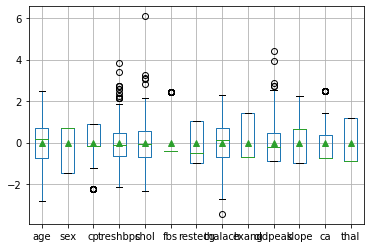

In [42]:
scaled_data.boxplot(column = column_name, showmeans= True)# showmeans 도 나오게
# plt.show()

In [43]:
# 과대적합 = 답만 외운 것, data가 조금만 달라져도 답을 주기 힘든 것
# 과소적합 = 학습이 덜 된 상태

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target, test_size = 0.30) # data 중 30%를 검증용으로 따로 보관한다. 랜덤하게
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('Y_train :', Y_train.shape)
print('Y_test :', Y_test.shape)

X_train : (207, 13)
X_test : (89, 13)
Y_train : (207, 1)
Y_test : (89, 1)


In [57]:
model = Sequential()
model.add(Dense(512 ,input_dim = 13, activation = 'relu')) # Param = 13*512+512 
model.add(Dropout(0.25)) # weight 중에 25%는 backward를 하지 않는다->weight, bias를 수정하지 않는다 , 매 epoch 마다 새롭게 25%를 뽑는다. 조절을 해 가며 찾아야 한다(경험적으로).
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1)) 
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               7168      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [58]:
model.compile(loss='mse', optimizer = 'adam', metrics= ['binary_accuracy']) # type1 error와 type2 error는 상보적관계, 데이터의 특성에 따라 민감도 특이도 정확도 등을 다르게 봐야 한다
fit_hist = model.fit(X_train, Y_train, batch_size = 50, epochs = 10, # batch_size => data를 50개씩 잘라서 학습, 50문제 이후 mse로 확인 후 재학습 
                     validation_split=0.2, verbose = 1) #validation_split = 첫 epochs에서는 80%를 뽑아서 학습, 그 후 나머지 20%를 가지고 검증을 한다

Epoch 1/10
4/4 [==============================] - 1s 64ms/step - loss: 0.2190 - binary_accuracy: 0.6667 - val_loss: 0.1601 - val_binary_accuracy: 0.7619
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 0.1375 - binary_accuracy: 0.8727 - val_loss: 0.1234 - val_binary_accuracy: 0.7857
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0969 - binary_accuracy: 0.8970 - val_loss: 0.1207 - val_binary_accuracy: 0.8095
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0834 - binary_accuracy: 0.8788 - val_loss: 0.1329 - val_binary_accuracy: 0.8095
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.0791 - binary_accuracy: 0.8909 - val_loss: 0.1373 - val_binary_accuracy: 0.8095
Epoch 6/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0682 - binary_accuracy: 0.9091 - val_loss: 0.1399 - val_binary_accuracy: 0.8095
Epoch 7/10
4/4 [==============================] - 0s 15ms/step - loss: 0.0651 - bi

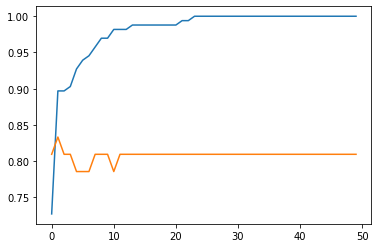

In [48]:
# binary_accuracy => 분류를 할 때 분류가 되었는지 확인 할 경우 , loss => 값을 예측할 때 얼마나 해당하는 값에 가까이 갔는지 확일할 때 
plt.plot(fit_hist.history['binary_accuracy']) # 80%가지고 구한 정확도
plt.plot(fit_hist.history['val_binary_accuracy']) # 
plt.show()

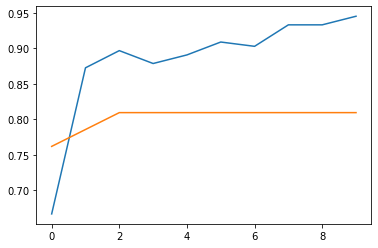

In [59]:
plt.plot(fit_hist.history['binary_accuracy']) # 80%가지고 구한 정확도
plt.plot(fit_hist.history['val_binary_accuracy']) # 
plt.show()

In [60]:
score = model.evaluate(X_test, Y_test, verbose= 0) # evaluate :학습을 하지 않고 loss, binary_accuracy  반환 , x 입력 y 타겟
print('Keras DNN model loss :',score[0])
print('Keras DNN model accuracy :',score[1]) 
# 무작정 많이 학습을 많이 하는 것이 좋은 것이 아니다. 학습을 많이 하게되면 과적합을 할 수 있다.

Keras DNN model loss : 0.20319430530071259
Keras DNN model accuracy : 0.7415730357170105
